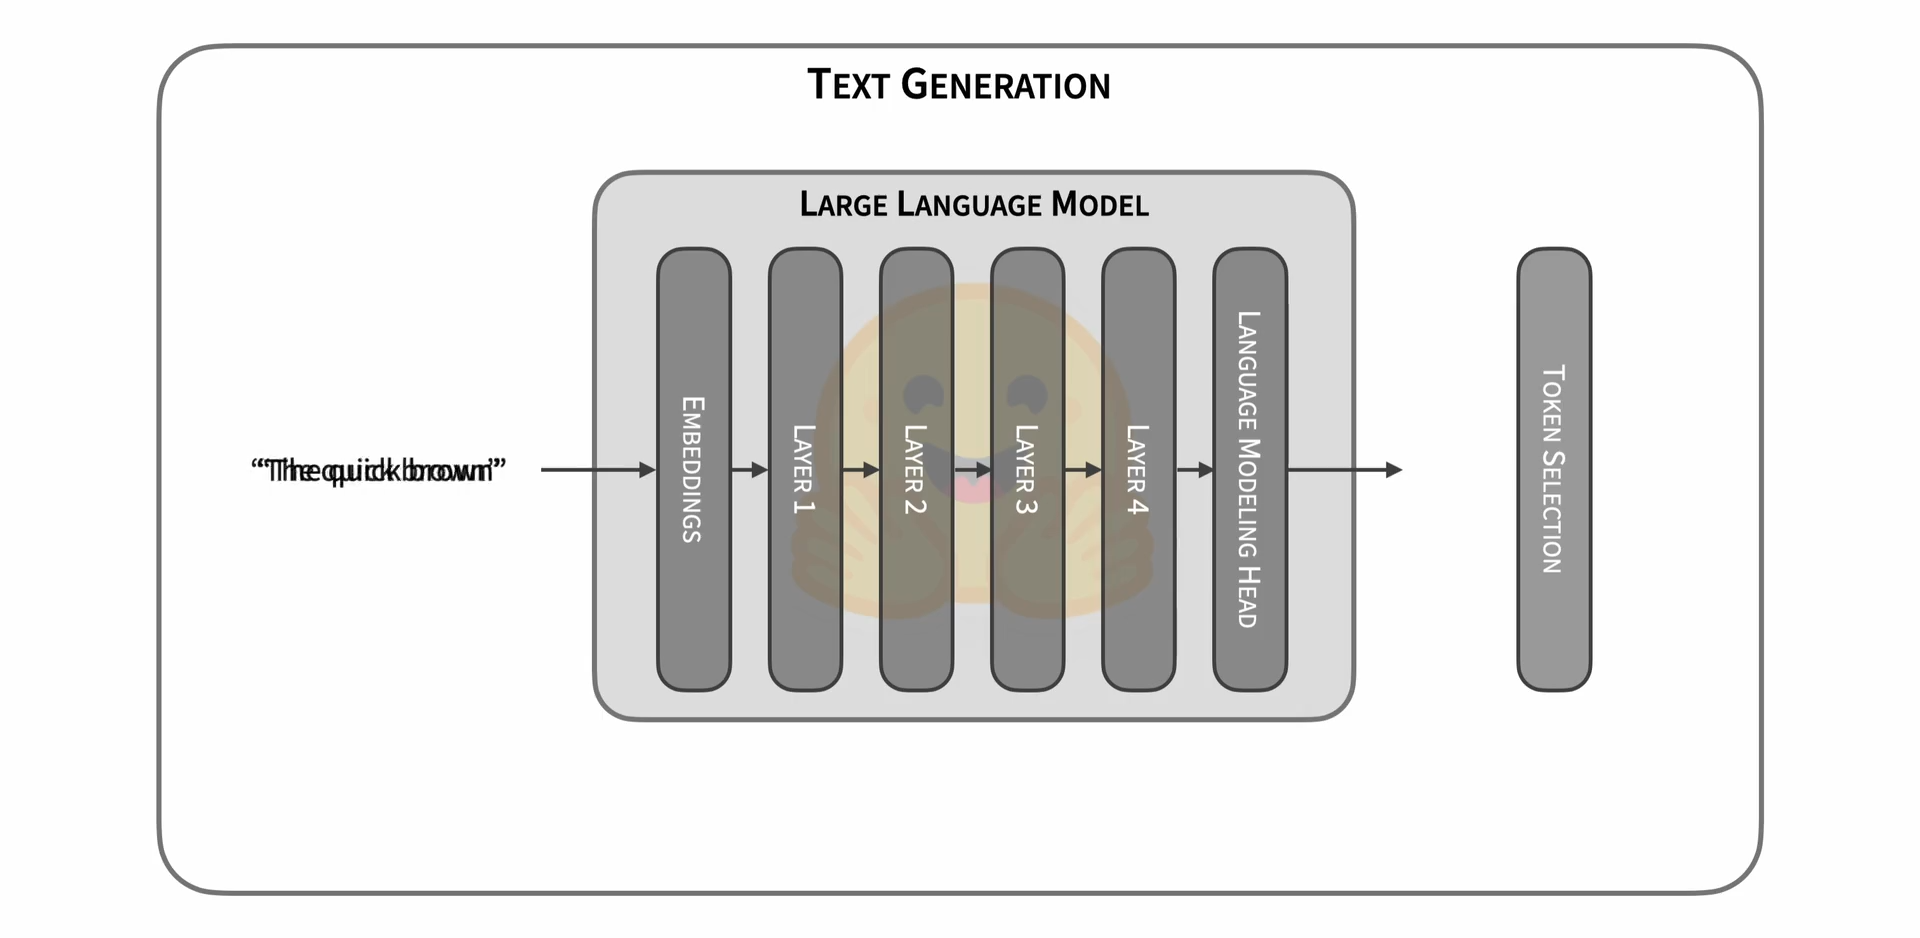

In [2]:
import re
import json
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_groq import ChatGroq

# Initialize the Groq API with your key
groq_api_key = "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"
llm = ChatGroq(
    groq_api_key=groq_api_key,
    model="gemma-7b-it"
)

In [3]:
# Workflow for Text-to-Text Generation
def text_to_text_workflow(input_text, task_description):
    """
    Generate text output based on the given task description and input text.

    :param input_text: The input text for the model to process.
    :param task_description: Description of the desired output (e.g., summarize, rewrite, etc.).
    :return: The generated text output.
    """
    # Define the prompt template
    template = """
    You are an advanced AI. Your task is: {task_description}.
    
    Input:
    {input_text}
    
    Output:
    """
    
    # Create the prompt
    prompt = PromptTemplate(template=template, input_variables=["task_description", "input_text"])
    
    # Create an LLM chain
    llm_chain = LLMChain(prompt=prompt, llm=llm)
    
    # Run the chain with input variables
    response = llm_chain.run({"task_description": task_description, "input_text": input_text})
    
    # Debugging: Print raw response
    print(f"Raw Response: {response}")
    
    # Clean and return the response
    try:
        output = response.strip()  # Strip extra whitespace
        return output
    except Exception as e:
        print(f"Error processing response: {e}")
        return "Error generating text."

In [4]:
# Example Use Cases
tasks = [
    {"task": "Summarize the following text.", "text": "Artificial Intelligence is transforming industries by automating tasks, enhancing efficiency, and enabling new capabilities."},
    {"task": "Rewrite the following text in a formal tone.", "text": "Hey, can you send me the report? I need it ASAP!"},
    {"task": "Generate a creative story based on the following prompt.", "text": "Once upon a time, in a land of perpetual winter, there was a lone fox searching for warmth."},
]


In [5]:
# Execute the workflow for each task
for task in tasks:
    print(f"Task: {task['task']}")
    print(f"Input Text: {task['text']}")
    output = text_to_text_workflow(task["text"], task["task"])
    print(f"Generated Output: {output}")
    print("-" * 50)

Task: Summarize the following text.
Input Text: Artificial Intelligence is transforming industries by automating tasks, enhancing efficiency, and enabling new capabilities.
Raw Response: **Summary:**

Artificial intelligence significantly enhances industrial automation, efficiency, and innovation capabilities.
Generated Output: **Summary:**

Artificial intelligence significantly enhances industrial automation, efficiency, and innovation capabilities.
--------------------------------------------------
Task: Rewrite the following text in a formal tone.
Input Text: Hey, can you send me the report? I need it ASAP!
Raw Response: Please forward the report to me at your earliest convenience. Time is of the essence. Thank you for your attention to this matter.
Generated Output: Please forward the report to me at your earliest convenience. Time is of the essence. Thank you for your attention to this matter.
--------------------------------------------------
Task: Generate a creative story based